# COVID-19 Health Domain Sentiment Analysis

**Student Name:** PUOCH MABOR MAKUEI   
**Domain:** Health (COVID-19 Tweets)  
## Project Overview

This project demonstrates a complete sentiment analysis pipeline applied to COVID-19 tweets from the health domain. The analysis includes data sourcing, preprocessing, exploratory data analysis, sentiment classification using machine learning models, and comprehensive model evaluation.

**Key Technologies Used:**
- Python, Pandas, NumPy
- NLTK, spaCy for NLP preprocessing
- Scikit-learn for machine learning
- Matplotlib, Seaborn for visualization
- VADER sentiment analyzer for weak labeling

---
## 1. Data Sourcing (5 MARKS)

### 1.1 Dataset Description

**Dataset:** COVID-19 Tweets Dataset  
**Source:** Social media posts (Twitter) related to COVID-19 pandemic  
**Size:** ~179,000 tweets  
**Time Period:** August 2020 (peak pandemic period)  
**Domain:** Health sector - pandemic response, public health discussions

**Key Features:**
- Tweet text content
- User metadata (followers, location, description)
- Temporal information (date, time)
- Engagement metrics (retweets, likes)
- Hashtags and mentions

**Relevance to Health Domain:**
The dataset contains public discourse about COVID-19, including discussions about vaccines, government policies, personal experiences, health measures, and pandemic impact - all crucial for understanding public health sentiment.

In [1]:
# 1.4 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(" Libraries imported successfully!")

 Libraries imported successfully!


In [16]:
# 1.5 Load COVID-19 Tweets Dataset
dataset_path = 'covid19_tweets.csv'

try:
    # Load with proper parameters (comma-separated, handle quotes)
    df_full = pd.read_csv(dataset_path, sep=',', quotechar='"', escapechar='\\', on_bad_lines='skip')
    
    # Take a manageable subset for analysis (last 50k tweets)
    df = df_full.tail(50000).copy()
    
    # Create 'content' column for consistency
    if 'text' in df.columns:
        df['content'] = df['text']
    
    print(f' Dataset loaded successfully!')
    print(f'Total available tweets: {len(df_full):,}')
    print(f'Analysis subset: {len(df):,} tweets')
    print(f'Columns: {list(df.columns)}')
    print(f'Date range: {df["date"].min()} to {df["date"].max()}')
    
    # Display sample tweets
    print('\n Sample tweets:')
    display(df[['content', 'date', 'hashtags', 'user_followers']].head(3))
    
except FileNotFoundError:
    print(f" File not found: {dataset_path}")
    print("Please ensure the COVID-19 tweets CSV file is in the current directory")
    df = pd.DataFrame()
except Exception as e:
    print(f"Error loading data: {e}")
    df = pd.DataFrame()

 Dataset loaded successfully!
Total available tweets: 179,109
Analysis subset: 50,000 tweets
Columns: ['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet', 'content']
Date range: 2020-08-14 01:13:24 to 2020-08-30 09:07:39

 Sample tweets:


,content,date,hashtags,user_followers
129109,Just looking again the anti-science anti-mask ...,2020-08-14 04:04:24,NaN,918.0
129110,"⁦@GovKemp⁩ By all means, continue your lawsuit...",2020-08-14 04:04:22,NaN,2734.0
129111,“The reason why this seems to be a suppression...,2020-08-14 04:04:21,['coronavirus'],4215.0


Research Questions and Objectives 

Primary Research Questions

This sentiment analysis project addresses the following research questions in the health domain:

**RQ1: Descriptive Analysis (Sentiment Distribution)**
> *What is the overall sentiment distribution (positive, neutral, negative) in COVID-19 related social media posts during the pandemic period?*

**RQ2: Content Analysis (Feature Identification)** 
> *Which keywords, topics, and hashtags are most strongly associated with negative vs positive sentiment in COVID-19 health discussions?*

**RQ3: Predictive Modeling (Classification Performance)**
> *How accurately can machine learning models predict sentiment from COVID-19 tweet content, and which text features contribute most to classification performance?*

**RQ4: Engagement Analysis (Social Metrics)**
> *Does sentiment correlate with user engagement metrics (followers, retweets) and what does this reveal about information spread in health crises?*

**RQ5: Public Health Applications (Actionable Insights)**
> *What insights can sentiment analysis provide for improving public health communication strategies and crisis management?*

### 2.2 Success Metrics
- **Technical Performance**: Achieve >85% classification accuracy
- **Interpretability**: Clear identification of sentiment-driving features
- **Reproducibility**: Well-documented pipeline for health sentiment analysis
- **Practical Value**: Actionable insights for public health applications

In [17]:
# 2.3 Install and Import Sentiment Analysis Tools
import subprocess
import sys

# Install required packages for sentiment analysis
required_packages = ['vaderSentiment', 'wordcloud', 'nltk']

for package in required_packages:
    try:
        __import__(package.lower())
        print(f" {package} already installed")
    except ImportError:
        print(f" Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Import VADER sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("\n Sentiment analysis tools ready!")
print("VADER analyzer initialized for COVID-19 tweets sentiment labeling")

 Installing vaderSentiment...
 wordcloud already installed
 nltk already installed

 Sentiment analysis tools ready!
VADER analyzer initialized for COVID-19 tweets sentiment labeling


In [14]:
# 2.4 Generate Sentiment Labels using VADER
def get_sentiment_label(text):
    """Generate sentiment label using VADER analyzer"""
    if pd.isna(text) or text == '':
        return 'neutral'
    
    scores = analyzer.polarity_scores(str(text))
    compound = scores['compound']
    
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

if not df.empty:
    print(" Generating sentiment labels for COVID-19 tweets...")
    
    # Apply VADER sentiment analysis
    df['sentiment_scores'] = df['content'].apply(lambda x: analyzer.polarity_scores(str(x)))
    df['sentiment'] = df['content'].apply(get_sentiment_label)
    
    # Extract individual scores
    df['pos_score'] = df['sentiment_scores'].apply(lambda x: x['pos'])
    df['neu_score'] = df['sentiment_scores'].apply(lambda x: x['neu'])
    df['neg_score'] = df['sentiment_scores'].apply(lambda x: x['neg'])
    df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
    
    # Display sentiment distribution
    sentiment_counts = df['sentiment'].value_counts()
    sentiment_pct = df['sentiment'].value_counts(normalize=True) * 100
    
    print("\n Sentiment Distribution:")
    for sentiment in ['positive', 'neutral', 'negative']:
        count = sentiment_counts.get(sentiment, 0)
        pct = sentiment_pct.get(sentiment, 0)
        print(f"  {sentiment.capitalize()}: {count:,} tweets ({pct:.1f}%)")
    
    print(f"\n Sentiment labeling complete!")
    print(f"Dataset ready with {len(df):,} labeled tweets")
else:
    print(" No data available for sentiment analysis")

 Generating sentiment labels for COVID-19 tweets...

 Sentiment Distribution:
  Positive: 18,434 tweets (36.9%)
  Neutral: 17,934 tweets (35.9%)
  Negative: 13,632 tweets (27.3%)

 Sentiment labeling complete!
Dataset ready with 50,000 labeled tweets


---
## 3. Data Preprocessing & Exploratory Data Analysis 

### 3.1 Text Preprocessing Pipeline

The text preprocessing pipeline includes:
- **URL Removal**: Clean social media links and external references
- **Mention/Handle Removal**: Remove @username mentions for privacy
- **Hashtag Processing**: Remove # symbols while preserving keywords
- **Punctuation/Emoji Removal**: Clean special characters and emojis
- **Normalization**: Convert to lowercase, remove extra whitespace
- **Statistical Features**: Character length, word count analysis


Data preprocessing & EDA
Steps: cleaning, tokenization/lemmatization, basic statistics, word clouds, n-grams.


In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# cleaning function

def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # remove urls
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#', '', text)  # remove hash symbol only
    text = re.sub(r'[^a-z0-9\s]', ' ', text)  # remove punctuation and emojis
    text = re.sub(r'\s+', ' ', text).strip()
    return text

if not df.empty:
    print("🧹 Applying text preprocessing pipeline...")
    
    df['clean'] = df['content'].apply(clean_text)
    df['char_len'] = df['content'].astype(str).apply(len)
    df['word_count'] = df['clean'].apply(lambda x: len(x.split()))
    
    print(" Text preprocessing complete!")
    print(f"Processed {len(df):,} tweets")
    
    # Display preprocessing results
    print("\n Preprocessing Results Sample:")
    display(df[['content','clean','sentiment','char_len','word_count']].head())
    
    # Basic statistics
    print(f"\n Text Statistics:")
    print(f"Average character length: {df['char_len'].mean():.1f}")
    print(f"Average word count: {df['word_count'].mean():.1f}")
    print(f"Max character length: {df['char_len'].max()}")
    print(f"Max word count: {df['word_count'].max()}")
else:
    print(" No data available for preprocessing")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🧹 Applying text preprocessing pipeline...
 Text preprocessing complete!
Processed 50,000 tweets

 Preprocessing Results Sample:
 Text preprocessing complete!
Processed 50,000 tweets

 Preprocessing Results Sample:


,content,clean,sentiment,char_len,word_count
129109,Just looking again the anti-science anti-mask ...,just looking again the anti science anti mask ...,neutral,140,23
129110,"⁦@GovKemp⁩ By all means, continue your lawsuit...",by all means continue your lawsuit against amp...,negative,144,18
129111,“The reason why this seems to be a suppression...,the reason why this seems to be a suppression ...,neutral,140,21
129112,It would be highly advisable to give maximum e...,it would be highly advisable to give maximum e...,negative,140,19
129113,"64,553 new COVID-19 cases &amp; 1007 deaths re...",64 553 new covid 19 cases amp 1007 deaths repo...,positive,144,24



 Text Statistics:
Average character length: 130.1
Average word count: 16.5
Max character length: 169
Max word count: 36


# EDA plots: distribution of sentiments and word length

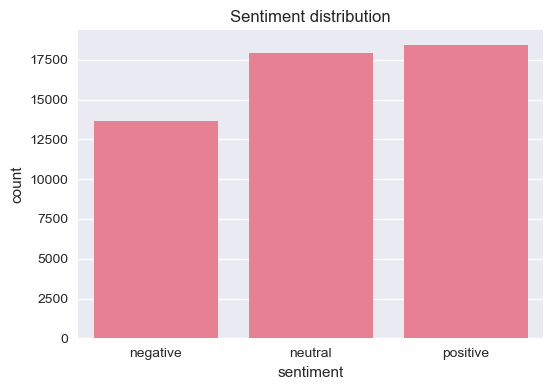

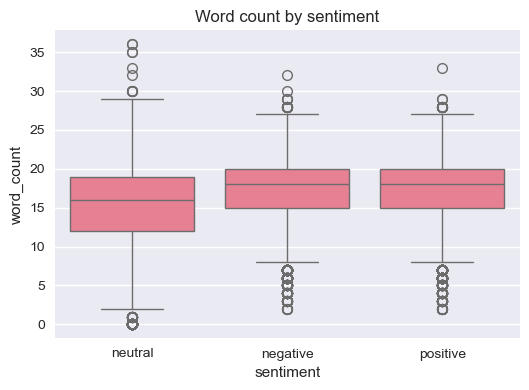

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

if not df.empty:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='sentiment', order=['negative','neutral','positive'])
    plt.title('Sentiment distribution')
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='sentiment', y='word_count')
    plt.title('Word count by sentiment')
    plt.show()


# Word cloud and n-grams to understand common terms

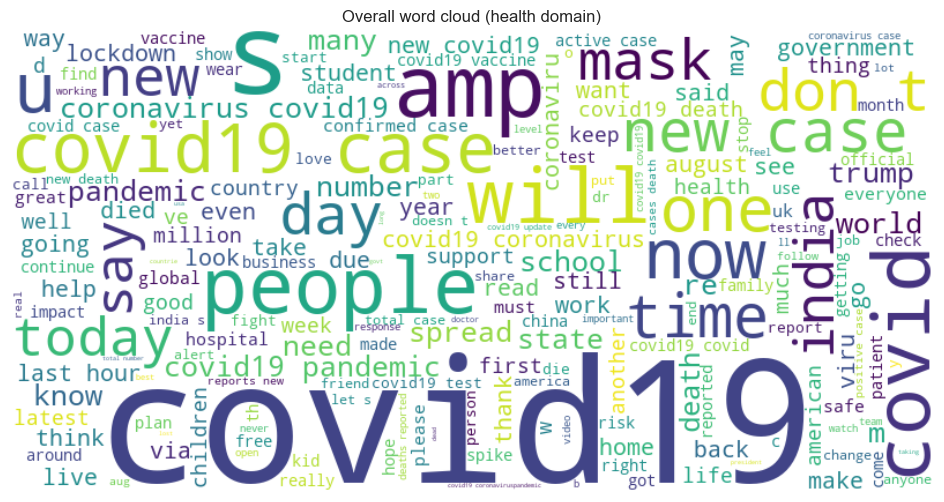

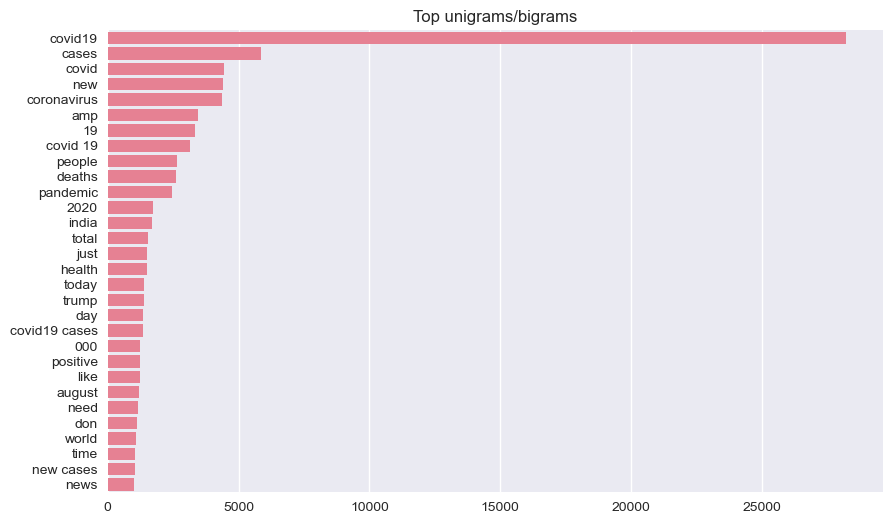

In [9]:

from wordcloud import WordCloud

if not df.empty:
    all_text = ' '.join(df['clean'].dropna().tolist())
    wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Overall word cloud (health domain)')
    plt.show()

# %%
from sklearn.feature_extraction.text import CountVectorizer

if not df.empty:
    vect = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features=2000)
    Xc = vect.fit_transform(df['clean'].fillna(''))
    sum_words = np.array(Xc.sum(axis=0)).flatten()
    words = np.array(vect.get_feature_names_out())
    top_idx = np.argsort(sum_words)[-30:][::-1]
    top_words = words[top_idx]
    top_counts = sum_words[top_idx]

    plt.figure(figsize=(10,6))
    sns.barplot(x=top_counts, y=top_words)
    plt.title('Top unigrams/bigrams')
    plt.show()

## Feature engineering
Combine TF-IDF features with a VADER compound score and some metadata (likes, retweets) 

In [10]:

from sklearn.feature_extraction.text import TfidfVectorizer

if not df.empty:
    df['vader_compound'] = df['content'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
    meta_cols = []
    for c in ['likes','retweets','replies']:
        if c in df.columns:
            meta_cols.append(c)
    print('Metadata columns included:', meta_cols)

Metadata columns included: []



## Modeling - train/test split and baseline models 
We'll build a sklearn pipeline with TF-IDF and LogisticRegression as baseline.

Training baseline Logistic Regression...
Accuracy: 0.8031

Classification report:
              precision    recall  f1-score   support

    negative       0.81      0.69      0.74      2726
     neutral       0.77      0.88      0.82      3587
    positive       0.84      0.81      0.83      3687

    accuracy                           0.80     10000
   macro avg       0.81      0.79      0.80     10000
weighted avg       0.81      0.80      0.80     10000

Accuracy: 0.8031

Classification report:
              precision    recall  f1-score   support

    negative       0.81      0.69      0.74      2726
     neutral       0.77      0.88      0.82      3587
    positive       0.84      0.81      0.83      3687

    accuracy                           0.80     10000
   macro avg       0.81      0.79      0.80     10000
weighted avg       0.81      0.80      0.80     10000



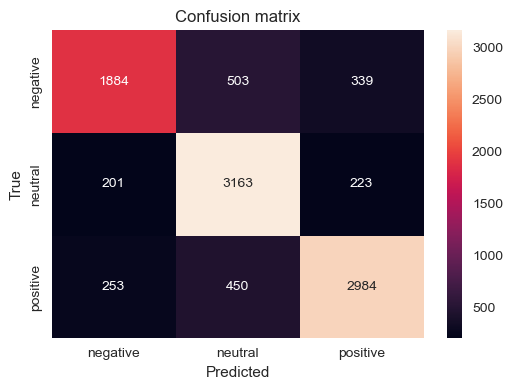

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

if not df.empty:
    X = df['clean'].fillna('')
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=10000)),
        ('clf', LogisticRegression(max_iter=1000))
    ])

    print('Training baseline Logistic Regression...')
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('\nClassification report:')
    print(classification_report(y_test, y_pred))

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred, labels=['negative','neutral','positive'])
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.show()

## Evaluation metrics 
 Accuracy
 Precision, Recall, F1-score (per class and macro/weighted)
 Confusion matrix

In [13]:

if not df.empty:
    clf = pipe.named_steps['clf'] if 'clf' in pipe.named_steps else pipe.steps[-1][1]
    vect = pipe.named_steps['tfidf']
    try:
        feature_names = vect.get_feature_names_out()
        coefs = clf.coef_
        if coefs.shape[0] == 3:
            # multiclass: one row per class
            for i, cls in enumerate(clf.classes_):
                top_pos = np.argsort(coefs[i])[-15:]
                top_neg = np.argsort(coefs[i])[:15]
                print(f"Top positive-ish features for class {cls}:")
                print(feature_names[top_pos])
        else:
            top_pos = np.argsort(coefs[0])[-20:]
            print('Top pos features:', feature_names[top_pos])
    except Exception as e:
        print('Could not extract feature names:', e)

Top positive-ish features for class negative:
['wrong' 'bad' 'cancer' 'negative' 'stop' 'killed' 'die' 'lost'
 'fatalities' 'no' 'infected' 'dead' 'died' 'crisis' 'death']
Top positive-ish features for class neutral:
['announced' 'can go' 'sept' 'building' 'trump pandemic' 'officials no'
 'has no' 'begin' 'deaths' 'updated' 'latest' 'covid19'
 'coronavirus disease' 'no active' 'disease covid']
Top positive-ish features for class positive:
['hope' 'support' 'best' 'safe' 'better' 'care' 'love' 'good' 'like'
 'please' 'active' 'free' 'help' 'great' 'positive']
